In [370]:
import numpy as np
from sklearn import preprocessing, model_selection, neighbors
import pandas as pd

In [371]:
df=pd.read_csv(r"C:\Users\KRISH\Documents\breast-cancer-wisconsin.data.txt")
df.replace('?',-99999,inplace=True)

df

,ID,Clump_Thickness,Unif_cell_sz,Unif_cell_shp,Marg_Adh,Single_epithelial_cell_size,Bare_nuclei,Bland_Chromatin,Normal_Nucleoli,Mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [372]:

df.columns=['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
df.drop(columns=['id'],inplace=True)

In [373]:
X=np.array(df.drop(columns=['class']))
y=np.array(df['class'])

In [374]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,)
clf=neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
accuracy

0.9785714285714285

In [375]:
example_measures=np.array([[4,2,1,1,1,2,3,2,1]])
print(example_measures.shape) 
example_measures=example_measures.reshape(len(example_measures),-1) # 1 row 9 features 
print(example_measures.shape)
prediction=clf.predict(example_measures)

print(prediction)

(1, 9)
(1, 9)
[2]


### K nearest neighbour from ground- Up

In [376]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import pandas as pd
import random
style.use('fivethirtyeight')

In [377]:
dataset={'k':[[1,2],[2,3],[3,1]],
         'r':[[6,5],[7,7],[8,6]]}
new_features=[5,7]
# for i in dataset:
#     for j in dataset[i]:
#         plt.scatter(j[0],j[1], s=20 ,color=i)

('r', 1.0)


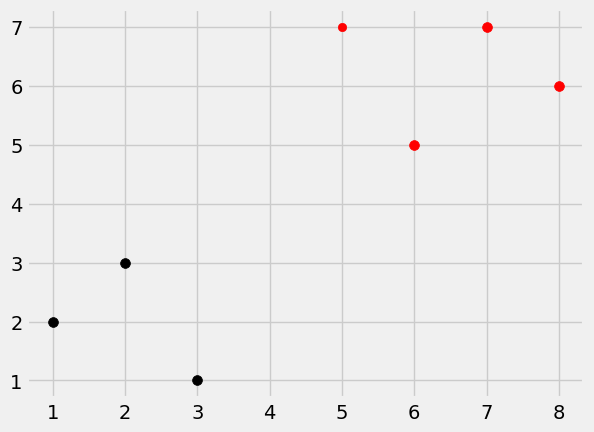

In [378]:
def k_nearest_neighbour(data,predict , k=3):
    if len(data)>=k:
        warnings.warn(' K is set to a value less than total voting groups')
    distances=[]
    for group in data:
        for features in data[group]:
            euclidean_dist=np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_dist,group])
    
    votes=[i[1] for i in sorted(distances)[:k]]
    vote_result= Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1]/k
    
    # print(vote_result,confidence)
    # print(distances)
    # print(votes)
    # print(Counter(votes).most_common())
    return vote_result,confidence
result=k_nearest_neighbour(dataset,new_features,k=3)
print(result) 
for i in dataset:
    for j in dataset[i]:
        plt.scatter(j[0],j[1], s=50 ,color=i)
plt.scatter(new_features[0],new_features[1],color=result)
plt.show()

In [379]:
df=pd.read_csv(r"C:\Users\KRISH\Documents\breast-cancer-wisconsin.data.txt")
df.replace('?',-99999,inplace=True)
df.columns=['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
df.drop(columns=['id'],inplace=True)
full_data=df.astype(float).values.tolist()  # since some values are in string , we need to convert them to float
full_data[:10]

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]

In [380]:
random.shuffle(full_data)
print(20*'#')
test_size=0.4
train_set={2:[],4:[]}
test_set={2:[],4:[]} # 2 and 4 are the classes
train_data=full_data[:-int(test_size*len(full_data))]
test_data=full_data[-int(test_size*len(full_data)):] #lass 20% of the data for testing
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])


####################


In [381]:
correct=0
total=0
for group in  test_set:
    for data in test_set[group]:
        
        vote,confidence=k_nearest_neighbour(train_set,data,k=5)
        if group==vote:
            correct+=1
        else:
            print(confidence)
        total+=1
print('Accuracy',correct/total)

0.8
0.8
1.0
1.0
0.6
0.6
Accuracy 0.978494623655914
